NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
Problem Statement:
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	Description
Pregnancies                  	Number of times pregnant
Glucose	Plasma                  glucose concentration in an oral glucose tolerance test
BloodPressure	                Diastolic blood pressure (mm Hg)
SkinThickness	                Triceps skinfold thickness (mm)
Insulin	                        Two hour serum insulin
BMI	                            Body Mass Index
DiabetesPedigreeFunction	    Diabetes pedigree function
Age                         	Age in years
Outcome                     	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

 

In [1]:
#!pip install imblearn

In [2]:
#!pip install scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing data set
df=pd.read_csv("health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. 


There are integer and float data type variables in this dataset. 
Create a count (frequency) plot describing the data types and the count of variables. 

In [6]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df['Outcome'].value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

From the analysis we can conclude that:

1. All are numerical variables ( dtypes:- int64, float64)
2. There are 768 rows and 9 features ( 8 independant variables and 1 dependant variable)
3. No missing values are noted in the statistical summary . But there are zeros present in 'Glucose',' BloodPressure',
   'SkinThickness', 'Insulin', 'BMI' columns. A value of zero does not make sense and thus can be treated as missing value.
4. Outliers noticed in 'Pregnancies' and 'Insulin 'feature
5. 'Outcome 'is the target variable which is binary (either 0 or 1)


### to check how many missing values(here zeroes) in features
 a value of zero does not make sense and thus indicates missing value 
-Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI 
has zeros

Visually explore these variables using histograms. Treat the missing values accordingly.

In [11]:
class_0 = df[df.Outcome ==0] # Outcome = 0 (i.e) Non-Diabetic Patient
class_1 = df[df.Outcome ==1] # Outcome = 1 (i.e) Diabetic Patient

class_0 = class_0.drop('Outcome', axis=1)
class_1 = class_1.drop('Outcome', axis=1)
       

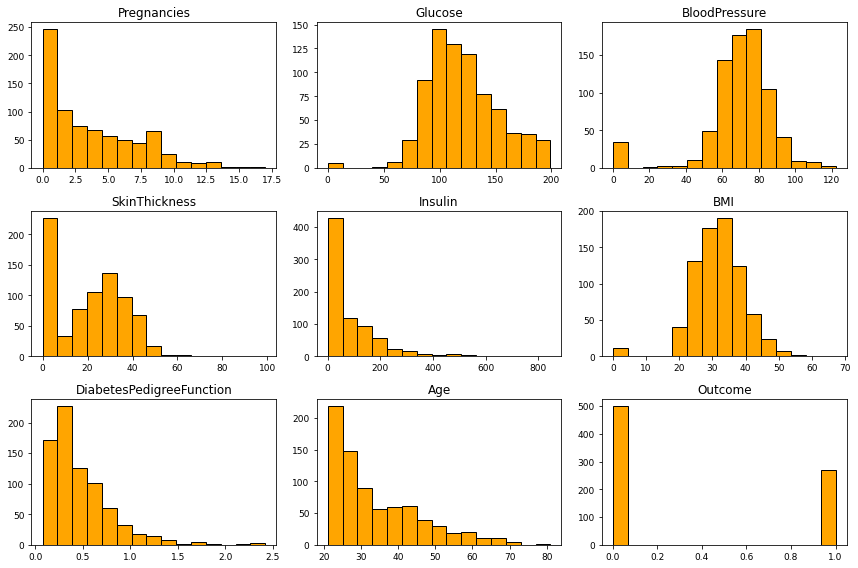

In [12]:

df.hist(bins=15,             
        color='orange', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot


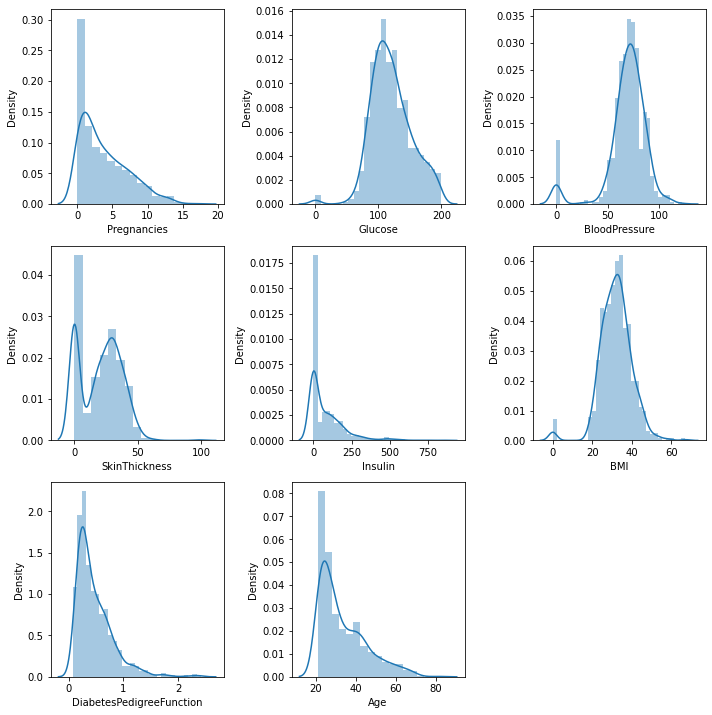

In [13]:
feature_cols=[col for col in df.columns if col != 'Outcome']

plt.figure(figsize=(10,10))
for i, feature in enumerate(feature_cols):
    
    plt.subplot(3, 3, i+1)
    
    sns.distplot(df[feature])

plt.tight_layout()
plt.show()

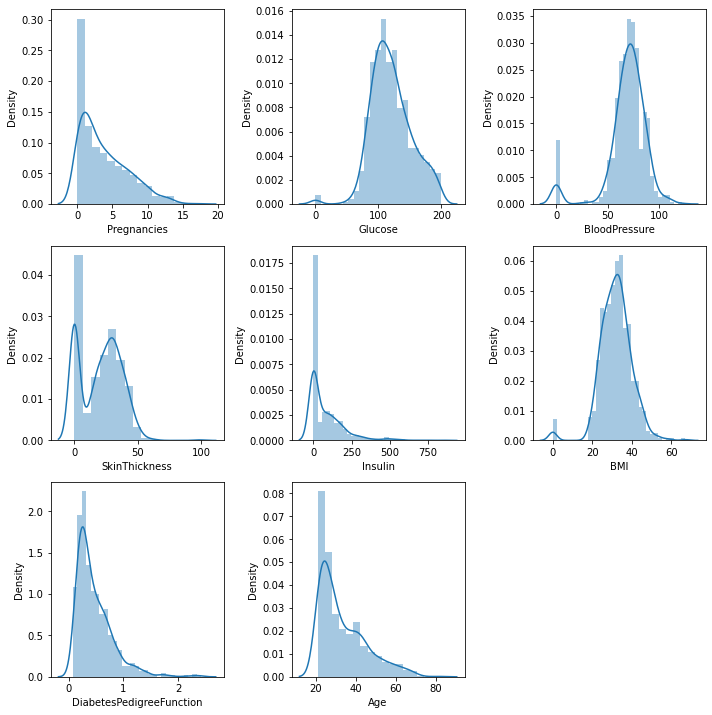

In [14]:
feature_cols=[col for col in df.columns if col != 'Outcome']

plt.figure(figsize=(10,10))
for i, feature in enumerate(feature_cols):
    
    plt.subplot(3, 3, i+1)
    
    sns.distplot(df[feature])

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import skew
for feature in feature_cols:
     print("Skewness of {0} is {1}". format(feature, skew(df[feature])))    

Skewness of Pregnancies is 0.8999119408414357
Skewness of Glucose is 0.17341395519987735
Skewness of BloodPressure is -1.8400052311728738
Skewness of SkinThickness is 0.109158762323673
Skewness of Insulin is 2.2678104585131753
Skewness of BMI is -0.42814327880861786
Skewness of DiabetesPedigreeFunction is 1.9161592037386292
Skewness of Age is 1.127389259531697


#### Observations:
1. BloodPressure and BMI are negatively skewed.
2. Pregnancies, Insulin, DiabetesPedigreeFunction and Age are positively skewed.
3. Glucose, SkinThickness are normally distributed

In [16]:
print('total number of rows{0}'.format(len(df)))
print('total number of rows missing Glucose {0}'.format(len(df.loc[df['Glucose']==0])))
print('total number of rows missing BloodPressure {0}'.format(len(df.loc[df['BloodPressure']==0])))
print('total number of rows missing SkinThickness {0}'.format(len(df.loc[df['SkinThickness']==0])))
print('total number of rows missing Insulin {0}'.format(len(df.loc[df['Insulin']==0])))
print('total number of rows missing BMI {0}'.format(len(df.loc[df['BMI']==0])))


total number of rows768
total number of rows missing Glucose 5
total number of rows missing BloodPressure 35
total number of rows missing SkinThickness 227
total number of rows missing Insulin 374
total number of rows missing BMI 11


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
#replacing 0 with nan
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=\
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.nan)

In [19]:
#finding the colum with zero values
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

For 'Pregnancies','Outcome ',it is reasonable to have zero value.\
'Pregnancies'=0 means never pregnant.\
'Outcome '=0 means non diabetic person.

In [20]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [22]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [23]:
#filling nan with mean()
df.fillna(df.mean(),inplace=True)

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [26]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
for feature in feature_cols:
    if feature not in ['BMI','DiabetesPedigreeFunction']:
        df[feature]=df[feature].apply(lambda x:int(x))

In [28]:
for feature in feature_cols:
     print("Skewness of {0} is {1}". format(feature, skew(df[feature])))

Skewness of Pregnancies is 0.8999119408414357
Skewness of Glucose is 0.5321159176218572
Skewness of BloodPressure is 0.14160775043921206
Skewness of SkinThickness is 0.8359714894564462
Skewness of Insulin is 3.0225630418916025
Skewness of BMI is 0.5970835583878779
Skewness of DiabetesPedigreeFunction is 1.9161592037386292
Skewness of Age is 1.127389259531697


#### There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [29]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


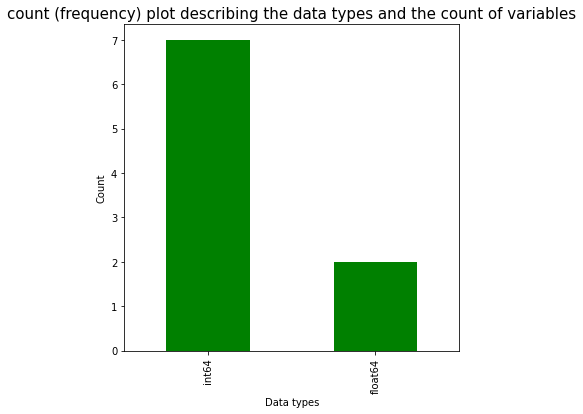

In [31]:
plt.figure(figsize=(6,6))
df.dtypes.value_counts().plot(kind='bar', color='green')
plt.title("count (frequency) plot describing the data types and the count of variables", fontsize=15,loc='center', color='Black')
plt.xlabel("Data types")
plt.ylabel("Count")
plt.show()

### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

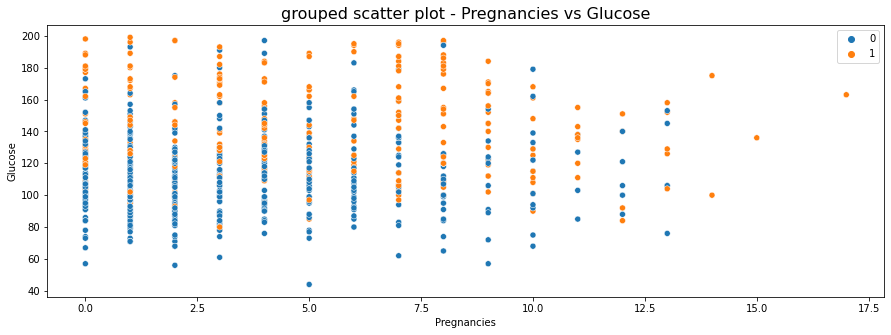

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Pregnancies',y='Glucose',data=df,hue='Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('grouped scatter plot - Pregnancies vs Glucose',fontsize=16)
plt.legend()
plt.show()

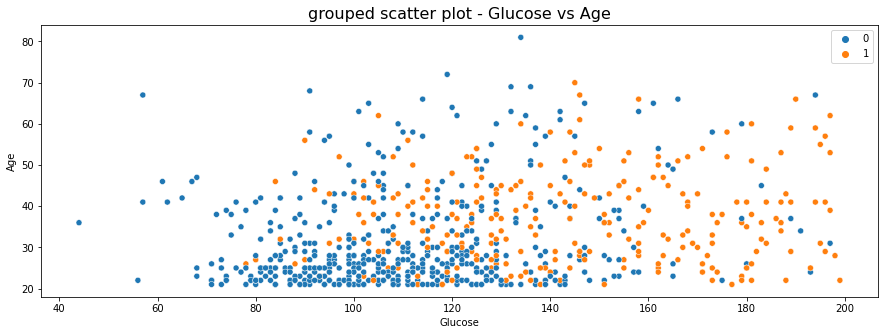

In [33]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Glucose',y='Age',data=df,hue='Outcome')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('grouped scatter plot - Glucose vs Age',fontsize=16)
plt.legend()
plt.show()

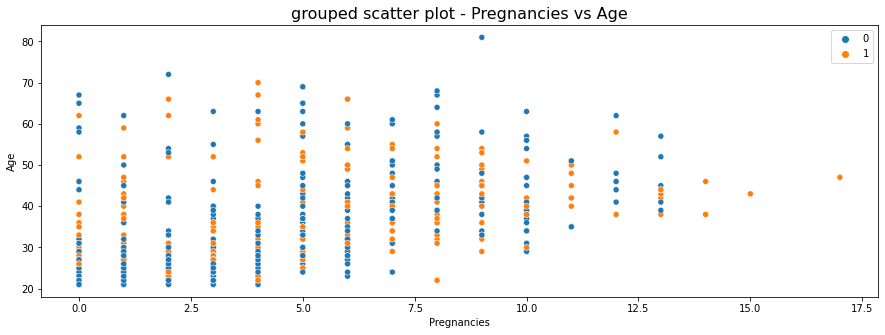

In [34]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Pregnancies',y='Age',data=df,hue='Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.title('grouped scatter plot - Pregnancies vs Age',fontsize=16)
plt.legend()
plt.show()

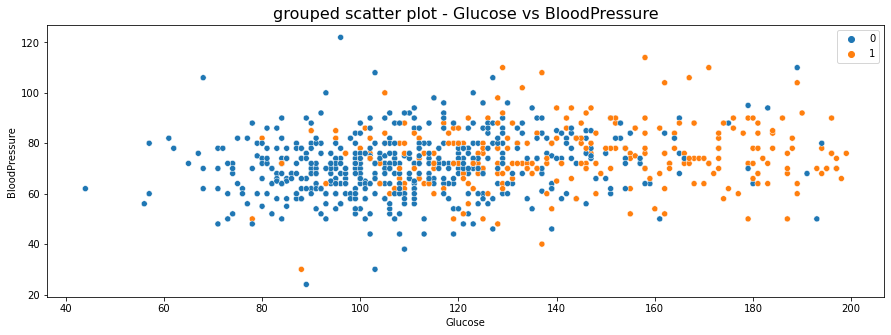

In [35]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Glucose',y='BloodPressure',data=df,hue='Outcome')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('grouped scatter plot - Glucose vs BloodPressure',fontsize=16)
plt.legend()
plt.show()

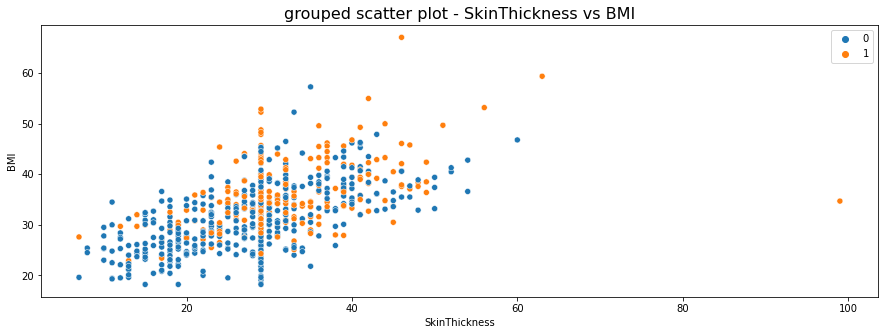

In [36]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='SkinThickness',y='BMI',data=df,hue='Outcome')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('grouped scatter plot - SkinThickness vs BMI',fontsize=16)
plt.legend()
plt.show()

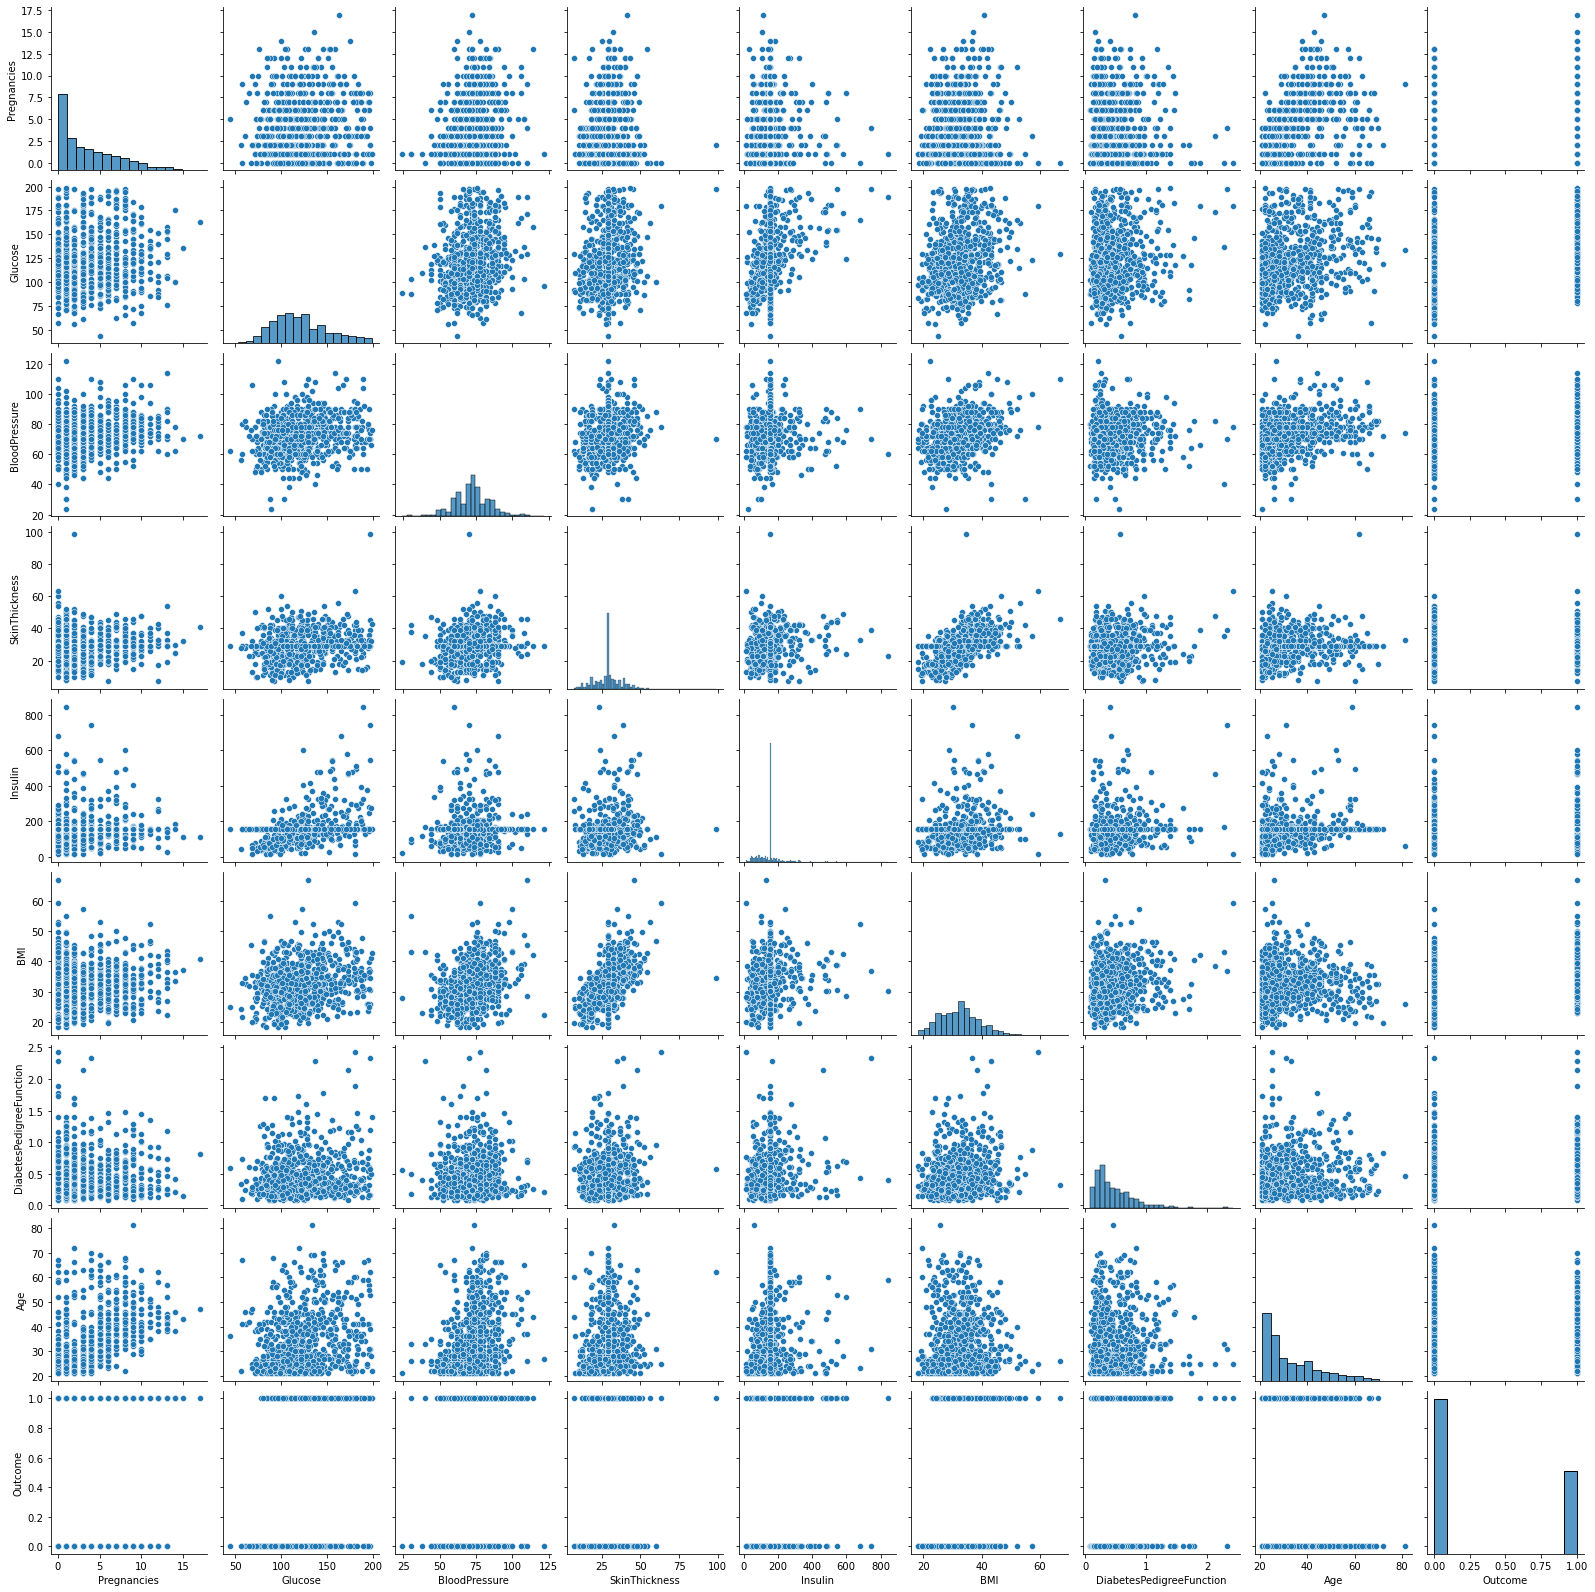

In [37]:
sns.pairplot(df)

No handles with labels found to put in legend.


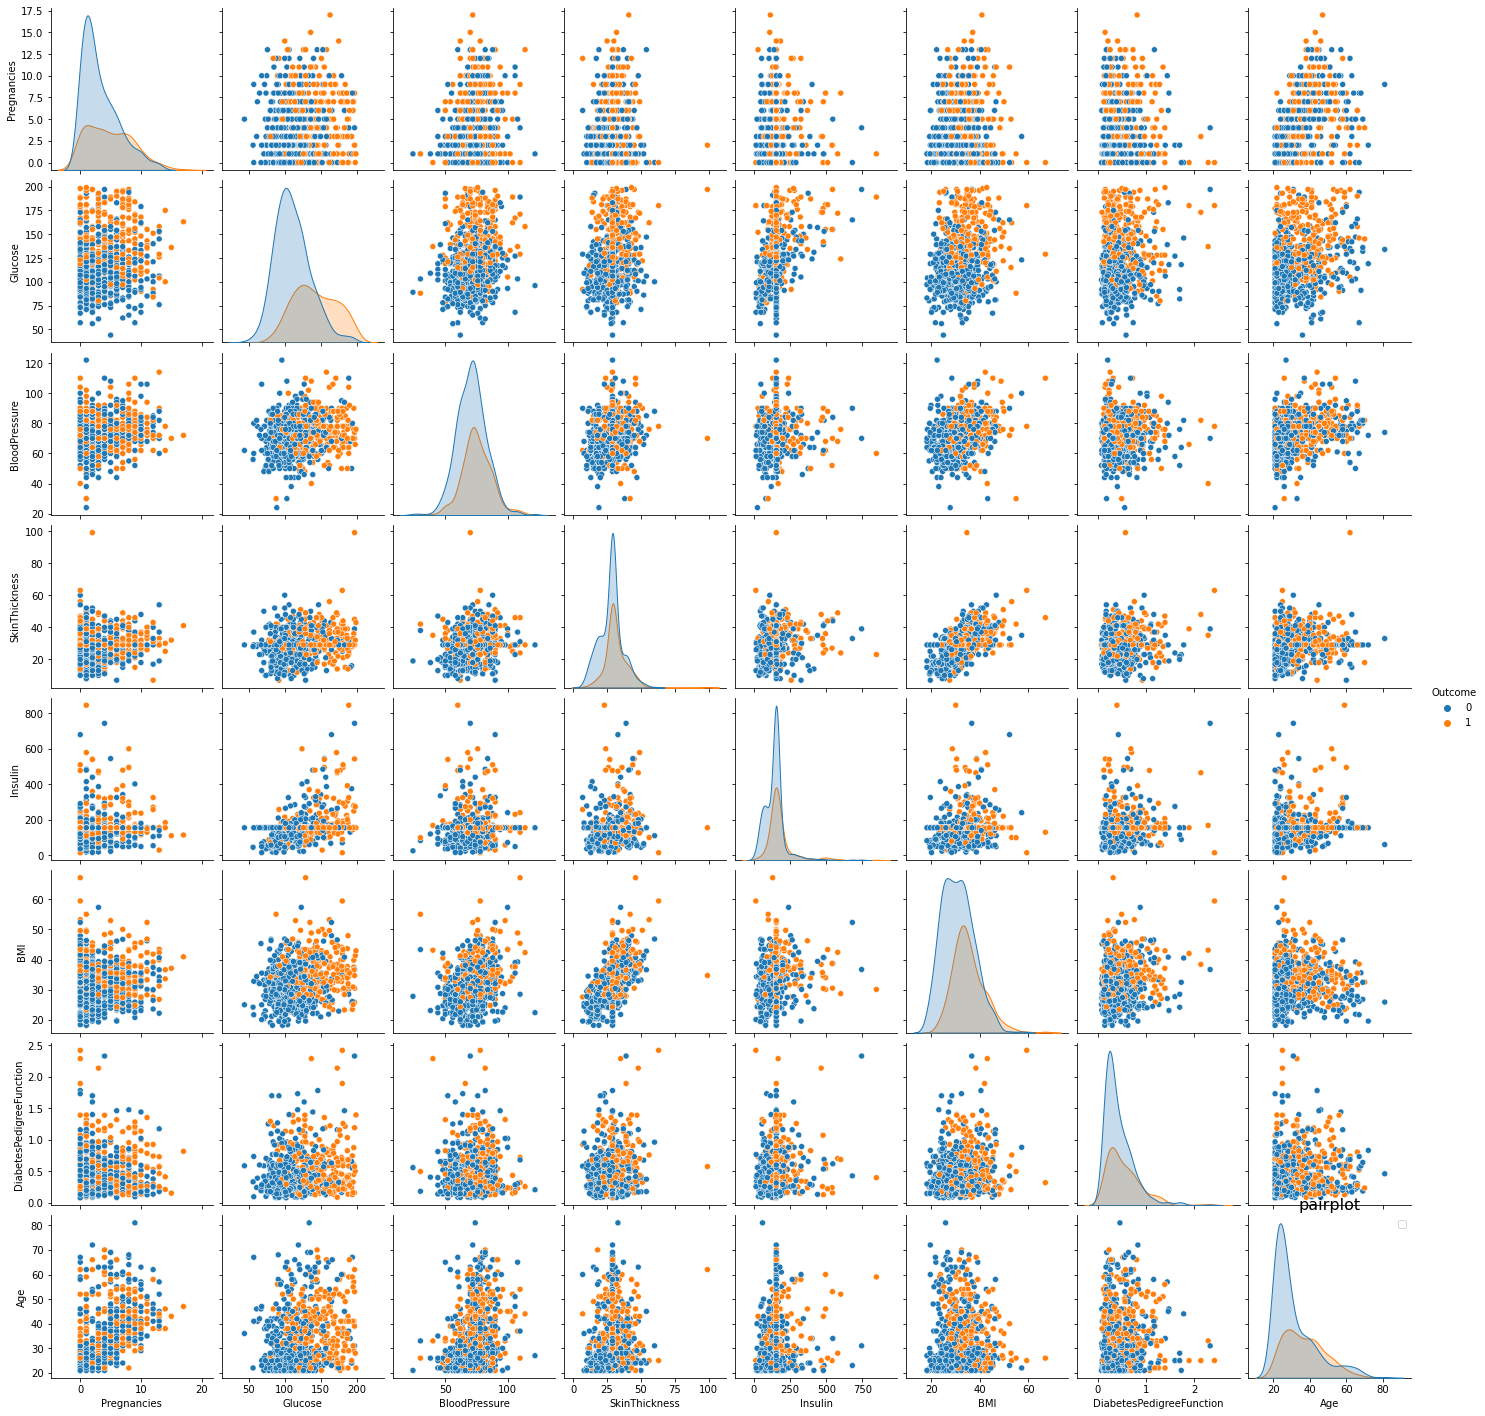

In [38]:
sns.pairplot(df, hue='Outcome')
plt.title('pairplot',fontsize=16)
plt.legend()
plt.show()

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,155,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,155,30.1,0.349,47,1


univariate analysis for two classes


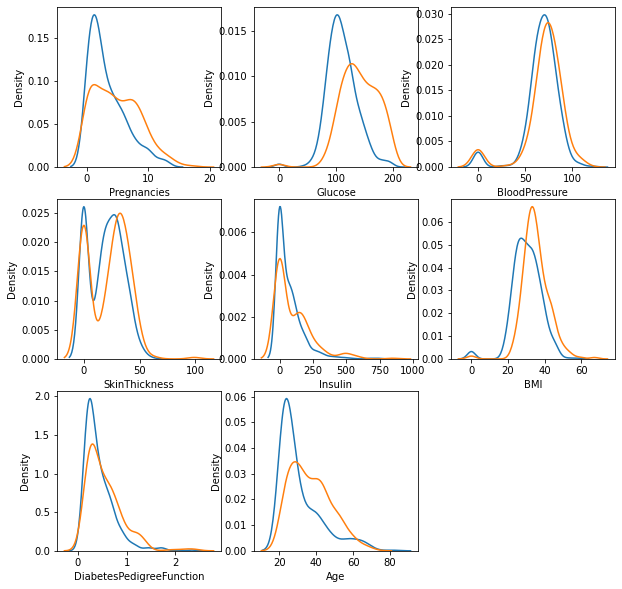

In [40]:
plt.figure(figsize=(10,10))
print('univariate analysis for two classes')
for i, feature in enumerate(feature_cols):
    
    plt.subplot(3, 3, i+1)
    
    sns.kdeplot(class_0[feature])
    sns.kdeplot(class_1[feature])


plt.show()

### Perform correlation analysis. Visually explore it using a heat map.

In [41]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.230932,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543162,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166881,0.099170,0.136050,0.214278
BMI,0.021565,0.230932,0.281319,0.543162,0.166881,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.311924,0.173844,0.238356,1.000000


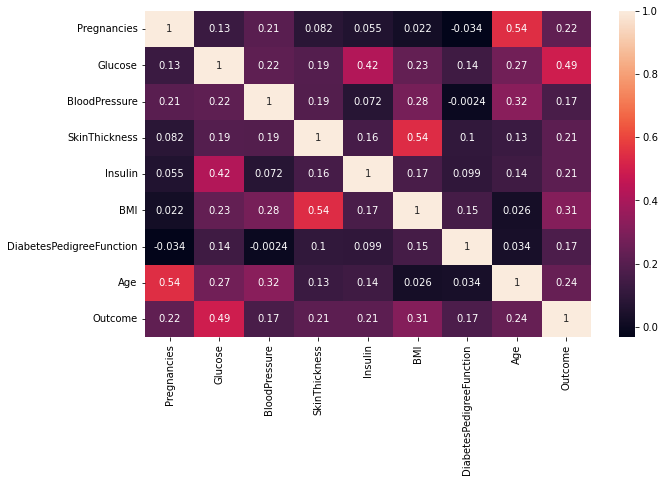

In [42]:
corrmap=df.corr()
top_corr_features= corrmap.index
plt.figure(figsize=(10,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [43]:
#To extract 3 features that have highest correlation with Outcome
df.corr().nlargest(n=4,columns='Outcome')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.311924,0.173844,0.238356,1.000000
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.230932,0.137100,0.266591,0.492911
BMI,0.021565,0.230932,0.281319,0.543162,0.166881,1.000000,0.153400,0.025519,0.311924
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025519,0.033561,1.000000,0.238356


In [44]:
df.corr().nlargest(n=4,columns='Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')

Glucose,BMI,Age,Pregnancies and skinthickness are .5,.31,.24,.22,.21  respectively correlated with outcome.\t
Age and Pregnancies are correlated.\t
Glucose andd Insulin are correlated.

#### Data Exploration:
Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.


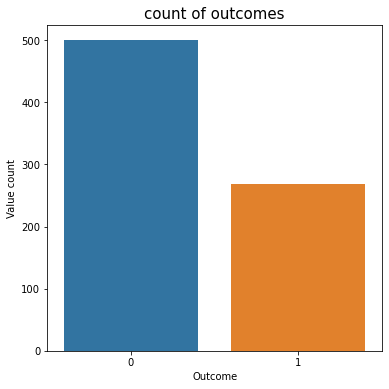

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(df['Outcome'])
plt.title("count of outcomes", fontsize=15,loc='center')
plt.xlabel("Outcome")
plt.ylabel("Value count")
plt.show()

In [46]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Data Modeling:
Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
Strategies:-

1. Here we have to predict wheather a person is diabatic or not
2. A supervised Machine Learning classification algorithm can be used.In Supervised learning, the model is first trained using   a Training set(it contains input-expected output pairs). This trained model can be later used to predict output 
3. Logistic regression can be used for binary classification
4. KNN modelling can de done
5. Tree based algorithms, also can be modelled, since the dataset has outliers.
6. Data Scaling must be done using RobustScaler because dataset has outliers
7. SMOTE(Synthetic Minority Over-sampling Technique) can be performed
8. for Classification problems  accuracy score  as well as  confusion metrics, classification reports can be evaluated.
9.Classification Reportis one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model. 

Metrics	Definition
-Precision is defined as the ratio of true positives to the sum of true and false positives.
Recall is defined as the ratio of true positives to the sum of true positives and false negatives.Recall is also called “True --Positive Rate” or “sensitivity”.
-The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
-Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process. 

10.

In [47]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler

In [48]:
rs = RobustScaler(with_centering=True, 
                  with_scaling=True, 
                  quantile_range=(25.0, 75.0), 
                  copy=True)


 The simplest way to fix imbalanced dataset is simply balancing them by 
oversampling instances of the minority class or undersampling instances of the majority class. 
Using advanced techniques like SMOTE(Synthetic Minority Over-sampling Technique)
will help you create new synthetic instances from minority class.


In [49]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE(sampling_strategy='auto')
x = df.drop(['Outcome'],axis = 'columns')
y = df['Outcome']
x_sm, y_sm = smt.fit_resample(x,y)


In [50]:
y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 0)
#Feature Scaling

In [52]:
x_train_sc= rs.fit_transform(x_train)
x_test_sc = rs.transform(x_test)

In [53]:
y_test.value_counts()

0    105
1     95
Name: Outcome, dtype: int64

In [54]:
y_train.value_counts()

1    405
0    395
Name: Outcome, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()

log_classifier.fit(x_train_sc,y_train)

LogisticRegression()

In [57]:
y_pred_logreg=log_classifier.predict(x_test_sc)
print('Accuracy of Logistic regression: {}'.format(accuracy_score(y_test,y_pred_logreg)))

Accuracy of Logistic regression: 0.77


In [58]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_logreg))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_logreg)))
target_names = ["non diabetic","diabetic"]
print( classification_report(y_test,y_pred_logreg,target_names = target_names ))

confusion_matrix:
[[83 22]
 [24 71]]
accuracy_score:0.77
              precision    recall  f1-score   support

non diabetic       0.78      0.79      0.78       105
    diabetic       0.76      0.75      0.76        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
knn_classifier .fit(x_train_sc, y_train)
y_pred_knn=knn_classifier.predict(x_test_sc)
print('Accuracy of KNN : {}'.format(accuracy_score(y_test,y_pred_knn)))

Accuracy of KNN : 0.805


In [60]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_knn))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_knn)))
target_names = ["non diabetic","diabetic"]
print( classification_report(y_test,y_pred_knn,target_names = target_names))

confusion_matrix:
[[86 19]
 [20 75]]
accuracy_score:0.805
              precision    recall  f1-score   support

non diabetic       0.81      0.82      0.82       105
    diabetic       0.80      0.79      0.79        95

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.81      0.80       200



### Support Vector Machine-Linear

In [61]:

from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear', random_state = 0)
svm_linear.fit(x_train_sc, y_train)
y_pred_svm_linear=svm_linear.predict(x_test_sc)
y_pred_tr_svm_linear=svm_linear.predict(x_train_sc)
print('Training Accuracy of SVM-linear: {}'.format(accuracy_score(y_train,y_pred_tr_svm_linear)))
print('Accuracy of SVM-linear: {}'.format(accuracy_score(y_test,y_pred_svm_linear)))

Training Accuracy of SVM-linear: 0.7425
Accuracy of SVM-linear: 0.77


In [62]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_svm_linear))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_svm_linear)))
print( classification_report(y_test,y_pred_svm_linear))

confusion_matrix:
[[82 23]
 [23 72]]
accuracy_score:0.77
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.76      0.76      0.76        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



### Support Vector Machine-RBF

In [63]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel = 'rbf', random_state = 0)
svm_rbf.fit(x_train_sc, y_train)
y_pred_svm_rbf=svm_rbf.predict(x_test_sc)
y_pred_tr_svm_rbf=svm_rbf.predict(x_train_sc)
print('Training Accuracy of SVM-RBF: {}'.format(accuracy_score(y_train,y_pred_tr_svm_rbf)))
print('Accuracy of SVM-RBF: {}'.format(accuracy_score(y_test,y_pred_svm_rbf)))

Training Accuracy of SVM-RBF: 0.775
Accuracy of SVM-RBF: 0.8


In [64]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_svm_rbf))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_svm_rbf)))
print( classification_report(y_test,y_pred_svm_rbf))

confusion_matrix:
[[83 22]
 [18 77]]
accuracy_score:0.8
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.78      0.81      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



### Naive Bayes-GaussianNB

In [65]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_sc, y_train)
y_pred_nb=nb_classifier.predict(x_test_sc)
print('Accuracy of Naive Bayes-Gaussian: {}'.format(accuracy_score(y_test,y_pred_nb)))

Accuracy of Naive Bayes-Gaussian: 0.78


In [66]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_nb))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_nb)))
print( classification_report(y_test,y_pred_nb))

confusion_matrix:
[[88 17]
 [27 68]]
accuracy_score:0.78
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       105
           1       0.80      0.72      0.76        95

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



### DecisionTree

Decision Tree is one of the most popular and powerful classification algorithms that we use in machine learning.
The decision tree from the name itself signifies that it is used for making decisions from the given dataset. 
The concept behind the decision tree is that it helps to select 
appropriate features for splitting the tree into subparts and the algorithm used behind the splitting is ID3

Accuracy of Decision Tree Classifier: 0.785


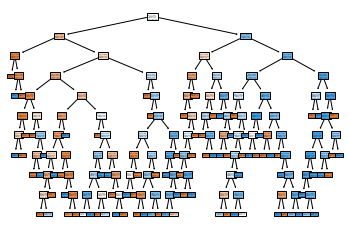

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 0)
dt_classifier.fit(x_train_sc, y_train)
y_pred_dt=dt_classifier.predict(x_test_sc)
from sklearn import tree
tree.plot_tree(dt_classifier,filled=True)
print('Accuracy of Decision Tree Classifier: {}'.format(accuracy_score(y_test,y_pred_dt)))

In [68]:
# BY TRIAL AND ERROR, ACCURACY IS MAX AT MAX_DEPTH=10

In [69]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_dt))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_dt)))
print( classification_report(y_test,y_pred_dt))

confusion_matrix:
[[77 28]
 [15 80]]
accuracy_score:0.785
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       105
           1       0.74      0.84      0.79        95

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



### RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,max_depth=6)
rf.fit(x_train_sc, y_train)
y_pred_rf=rf.predict(x_test_sc)
print('Accuracy of Random Forest Classifier: {}'.format(accuracy_score(y_test,y_pred_rf)))

Accuracy of Random Forest Classifier: 0.835


In [71]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_rf))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_rf)))
print( classification_report(y_test,y_pred_rf))

confusion_matrix:
[[84 21]
 [12 83]]
accuracy_score:0.835
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.80      0.87      0.83        95

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



In [72]:
print('accuracy_score:{}'.format(accuracy_score(y_pred_rf,y_test)))

accuracy_score:0.835


In [73]:
print(rf.feature_importances_)


[0.06548642 0.23273176 0.04450643 0.12489685 0.06102551 0.20291211
 0.10929203 0.15914888]


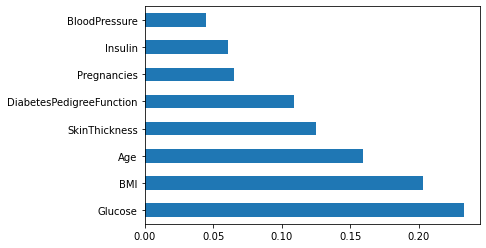

In [74]:
ranked_features=pd.Series(rf.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Random Forest with selected features

In [75]:
# Using the selected fetures to predict outcome
features_selected =['Glucose','BMI','Age','SkinThickness','DiabetesPedigreeFunction']
x_train_new= x_train[features_selected]
x_test_new=x_test[features_selected]

In [76]:
x_train_scaled_new =rs.fit_transform(x_train_new)
x_test_scaled_new=rs.transform(x_test_new)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,max_depth=4)
rf1.fit(x_train_scaled_new, y_train)
y_pred_rf_nw=rf1.predict(x_test_scaled_new)
print('Accuracy of Random Forest Classifier with selected features: {}'.format(accuracy_score(y_test,y_pred_rf_nw)))

Accuracy of Random Forest Classifier with selected features: 0.865


In [78]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_rf_nw))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_rf_nw)))
print( classification_report(y_test,y_pred_rf_nw))

confusion_matrix:
[[86 19]
 [ 8 87]]
accuracy_score:0.865
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       105
           1       0.82      0.92      0.87        95

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200



In [79]:
rf.predict_proba(x_test_sc)

array([[0.22476238, 0.77523762],
       [0.34848038, 0.65151962],
       [0.27930733, 0.72069267],
       [0.90077827, 0.09922173],
       [0.83066536, 0.16933464],
       [0.15179052, 0.84820948],
       [0.99583333, 0.00416667],
       [0.40924446, 0.59075554],
       [0.39042961, 0.60957039],
       [0.4292393 , 0.5707607 ],
       [0.66977422, 0.33022578],
       [0.4101055 , 0.5898945 ],
       [0.13096066, 0.86903934],
       [0.80519466, 0.19480534],
       [0.52761813, 0.47238187],
       [0.99833333, 0.00166667],
       [0.718373  , 0.281627  ],
       [0.11503836, 0.88496164],
       [0.49414339, 0.50585661],
       [0.6756732 , 0.3243268 ],
       [0.17377605, 0.82622395],
       [0.60232009, 0.39767991],
       [0.73512023, 0.26487977],
       [0.42760962, 0.57239038],
       [0.2544467 , 0.7455533 ],
       [0.11978372, 0.88021628],
       [0.1652844 , 0.8347156 ],
       [0.87297619, 0.12702381],
       [0.90915153, 0.09084847],
       [0.7007294 , 0.2992706 ],
       [0.

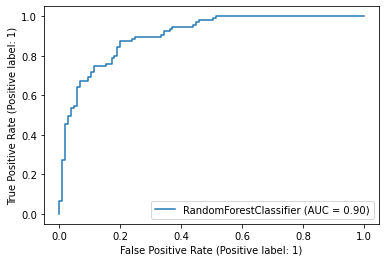

0.9042606516290728

In [80]:
from sklearn import  metrics
from sklearn.metrics import roc_auc_score

metrics.plot_roc_curve(rf, x_test_sc, y_test) 
plt.show()
roc_auc_score(y_test, rf.predict_proba(x_test_sc)[:, 1])

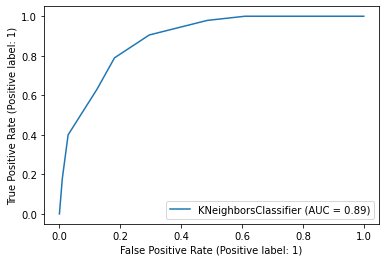

0.8853634085213032

In [81]:
metrics.plot_roc_curve(knn_classifier, x_test_sc, y_test) 

plt.show()
roc_auc_score(y_test, knn_classifier.predict_proba(x_test_sc)[:, 1])

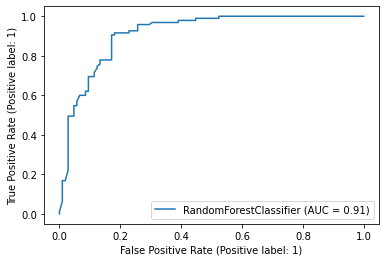

0.913233082706767

In [82]:
#ROC_AUC curve of Random Forest with selected features

metrics.plot_roc_curve(rf1, x_test_scaled_new, y_test) 
plt.show()
roc_auc_score(y_test, rf1.predict_proba(x_test_scaled_new)[:, 1])

### ExtraTreesClassifier

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train_sc,y_train)

y_pred_etc=etc.predict(x_test_sc)
print('Accuracy of ExtraTreesClassifier: {}'.format(accuracy_score(y_test,y_pred_etc)))

Accuracy of ExtraTreesClassifier: 0.875


In [106]:
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_etc))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_etc)))
print( classification_report(y_test,y_pred_etc))

confusion_matrix:
[[90 15]
 [10 85]]
accuracy_score:0.875
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       105
           1       0.85      0.89      0.87        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



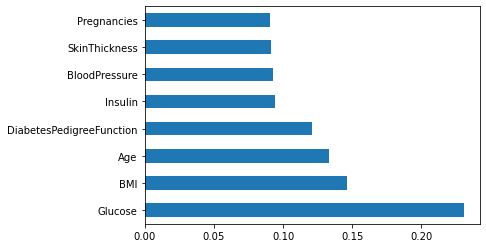

In [111]:
ranked_features=pd.Series(etc.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

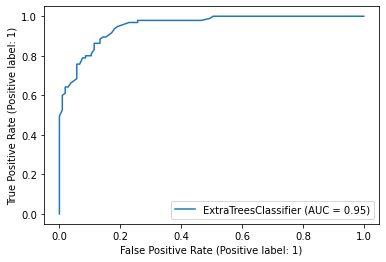

0.9515288220551378

In [112]:
#ROC_AUC curve of ExtraTreesClassifier with selected features

metrics.plot_roc_curve(etc, x_test_sc, y_test) 
plt.show()
roc_auc_score(y_test, etc.predict_proba(x_test_sc)[:, 1])

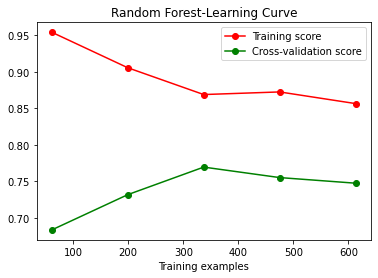

In [87]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rf, x, y, n_jobs=-1, cv=5, 
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Random Forest-Learning Curve")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()

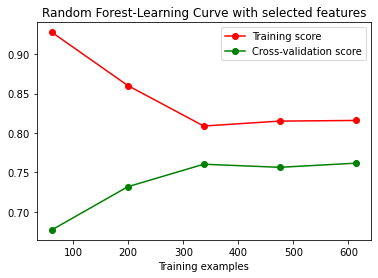

In [88]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rf1, x, y, n_jobs=-1, cv=5, 
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Random Forest-Learning Curve with selected features")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()

In [108]:

models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,max_depth=6)),
          ('KNN', KNeighborsClassifier(n_neighbors = 8)),
          ('SVM-linear', SVC(kernel = 'linear', random_state = 0)),
          ('SVM-RBF', SVC(kernel = 'rbf', random_state = 0)), 
          ('GNB', GaussianNB()),
          ('decision tree',DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 0))
          
        ]
accuracy = []
names = []
precision=[]
recall=[]
f1_score=[]
roc_auc=[]
target_names = ["non diabetic","diabetic"]
for name, model in models:
       
        clf = model.fit(x_train_sc, y_train)
        y_pred = clf.predict(x_test_sc)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        recall.append(metrics.recall_score(y_test, y_pred))
        precision.append(metrics.precision_score(y_test, y_pred))
        f1_score.append(metrics.f1_score(y_test, y_pred))
        roc_auc.append(metrics.roc_auc_score(y_test, y_pred))
        print("------------------------------------------------------------------")
        accuracy.append(accuracy_score(y_test,y_pred)*100 )
        names.append(name)
        
       

Logistic Regression
              precision    recall  f1-score   support

non diabetic       0.78      0.79      0.78       105
    diabetic       0.76      0.75      0.76        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

------------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

non diabetic       0.88      0.80      0.84       105
    diabetic       0.80      0.87      0.83        95

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

------------------------------------------------------------------
KNN
              precision    recall  f1-score   support

non diabetic       0.81      0.82      0.82       105
    diabetic       0.80      0.79      0.79        95

    accura

In [100]:
print( 'Random Forest with selected features')
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_rf_nw))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_rf_nw)))
print( classification_report(y_test,y_pred_rf_nw))

Random Forest with selected features
confusion_matrix:
[[86 19]
 [ 8 87]]
accuracy_score:0.865
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       105
           1       0.82      0.92      0.87        95

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200



In [110]:
print( 'ExtraTreesClassifier')
print( 'confusion_matrix:')
print( confusion_matrix(y_test,y_pred_etc))
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred_etc)))
print( classification_report(y_test,y_pred_etc))

ExtraTreesClassifier
confusion_matrix:
[[90 15]
 [10 85]]
accuracy_score:0.875
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       105
           1       0.85      0.89      0.87        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



In [109]:
list1=list(zip(accuracy,precision,recall,f1_score,roc_auc)).append([])
result=pd.DataFrame(list1,index=names,columns=['accuracy','precision','recall','f1_score','roc_auc'])

In [94]:
result

,accuracy,precision,recall,f1_score,roc_auc
Logistic Regression,77.0,0.763441,0.747368,0.755319,0.768922
Random Forest,83.5,0.798077,0.873684,0.834171,0.836842
KNN,80.5,0.797872,0.789474,0.793651,0.804261
SVM-linear,77.0,0.757895,0.757895,0.757895,0.769424
SVM-RBF,80.0,0.777778,0.810526,0.793814,0.800501
GNB,78.0,0.800000,0.715789,0.755556,0.776942
decision tree,78.5,0.740741,0.842105,0.788177,0.787719


                                      accuracy  precision	recall	f1_score  roc_auc
Random Forest with selected features    86     ,   0.82     ,  0.92 ,    0.87  ,     94

extraTreesClassifier                    88   ,     0.85    ,   0.89   ,   0.87   ,   95



so we can conclude that extraTreesClassifier  algorithm  have better accuracy,recall score
and f1 score  compared to other models.
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique 
which aggregates the results of multiple de-correlated decision trees collected in a “forest” 
to output it's classification result